In [1]:
import pandas as pd
import numpy as np
import datetime
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Changing default parameters of graph title and axes
params = {'axes.titlesize':'25',
          'axes.labelsize':'20',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
          'legend.fontsize': '20',
          'legend.handlelength': '2'}
matplotlib.rcParams.update(params)

# Load Data

In [2]:
tweets = pd.read_csv('C:/Users/melin/Documents/Springboard Data Science Career Track/Capstone Projects/Capstone Project 2/tweets_sentiment.csv')

# Post Statistical Analysis

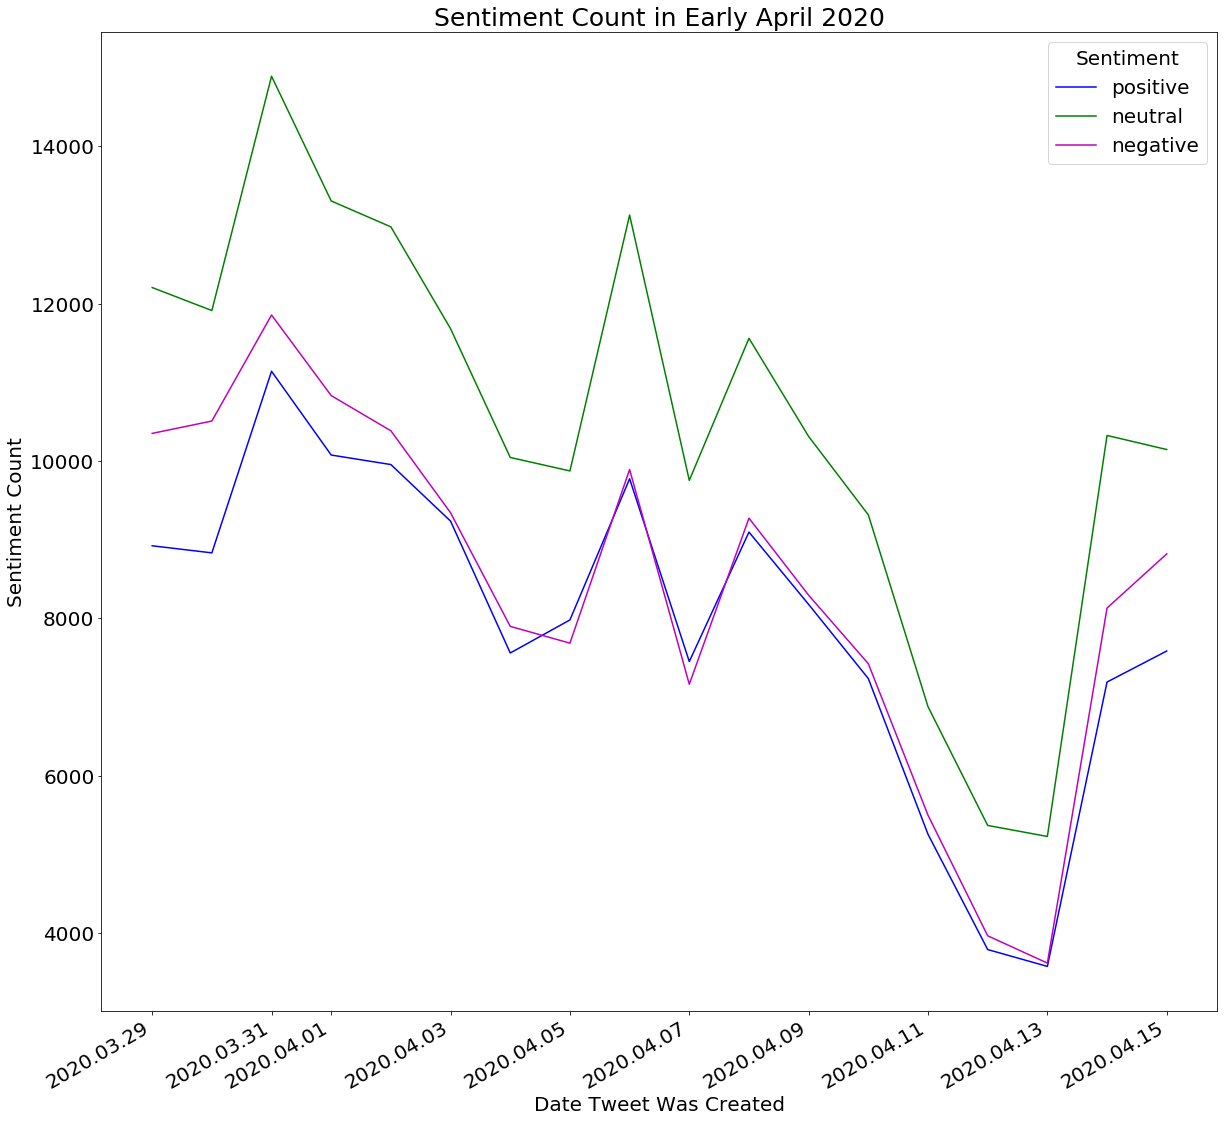

In [3]:
##Create lineplot counting sentiment labels of COVID-19 tweets created in early April 2020 (03-29-2020 to 04-15-2020)
early_april2020 = tweets[tweets['created_at'] < '2020-04-16'].copy()

# Convert the account_created_at column to a Datetime format and then into string
early_april2020.created_at = pd.to_datetime(early_april2020.created_at)
early_april2020 = early_april2020.sort_values(by=['created_at'])
early_april2020.created_at = early_april2020.created_at.apply(lambda x: x.strftime('%Y-%m-%d'))

# make the time range for the x-axis
time = mdates.drange(datetime.datetime(2020, 3, 29), 
                     datetime.datetime(2020, 4, 16),
                     datetime.timedelta(days=1))

# create count y variable for sentiment column
positive_count = np.array(early_april2020.sentiment.eq('positive').groupby(early_april2020.created_at).sum())
neutral_count = np.array(early_april2020.sentiment.eq('neutral').groupby(early_april2020.created_at).sum())
negative_count = np.array(early_april2020.sentiment.eq('negative').groupby(early_april2020.created_at).sum())

# create lineplot
fig, ax = plt.subplots(figsize = (20,20))
ax.plot(time, positive_count, color='b', label='positive')
ax.plot(time, neutral_count, color='g', label='neutral')
ax.plot(time, negative_count, color='m', label='negative')

# Add some text for labels, title, etc.
ax.set_xlabel('Date Tweet Was Created')
ax.set_ylabel('Sentiment Count')
ax.set_title('Sentiment Count in Early April 2020')
ax.legend(title='Sentiment', title_fontsize=20)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()

plt.show()

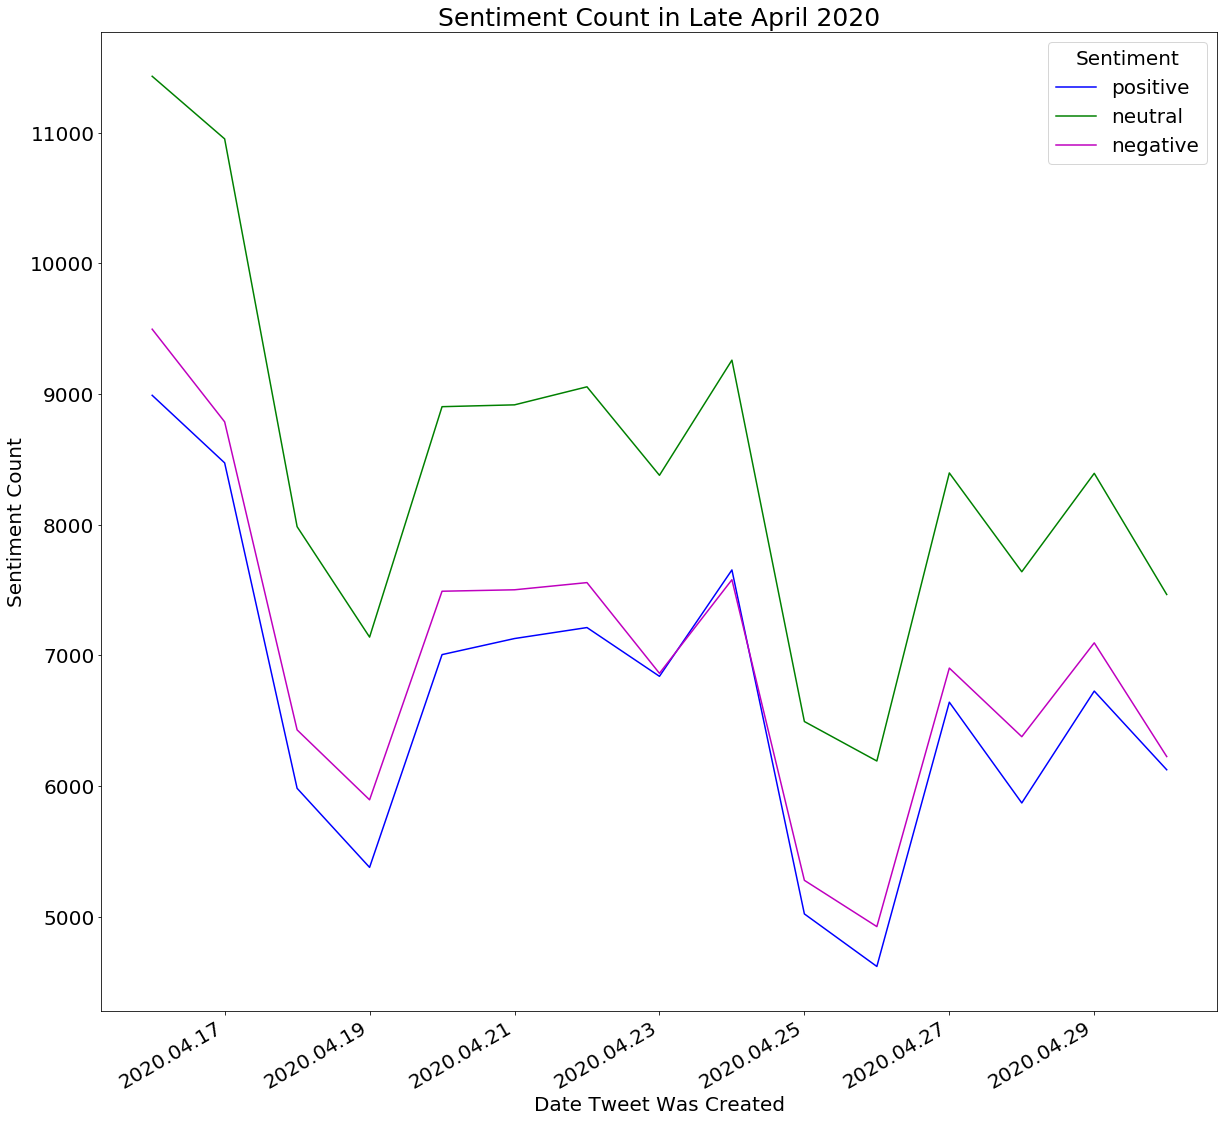

In [4]:
##Create lineplot counting sentiment labels of COVID-19 tweets created in late April 2020 (04-16-2020 to 04-30-2020)
late_april2020 = tweets[tweets['created_at'] >= '2020-04-16'].copy()

# Convert the account_created_at column to a Datetime format and then into string
late_april2020.created_at = pd.to_datetime(late_april2020.created_at)
late_april2020 = late_april2020.sort_values(by=['created_at'])
late_april2020.created_at = late_april2020.created_at.apply(lambda x: x.strftime('%Y-%m-%d'))

# make the time range for the x-axis
time = mdates.drange(datetime.datetime(2020, 4, 16), 
                     datetime.datetime(2020, 5, 1),
                     datetime.timedelta(days=1))

# create count y variable for sentiment column
positive_count = np.array(late_april2020.sentiment.eq('positive').groupby(late_april2020.created_at).sum())
neutral_count = np.array(late_april2020.sentiment.eq('neutral').groupby(late_april2020.created_at).sum())
negative_count = np.array(late_april2020.sentiment.eq('negative').groupby(late_april2020.created_at).sum())

# create lineplot
fig, ax = plt.subplots(figsize = (20,20))
ax.plot(time, positive_count, color='b', label='positive')
ax.plot(time, neutral_count, color='g', label='neutral')
ax.plot(time, negative_count, color='m', label='negative')

# Add some text for labels, title, etc.
ax.set_xlabel('Date Tweet Was Created')
ax.set_ylabel('Sentiment Count')
ax.set_title('Sentiment Count in Late April 2020')
ax.legend(title='Sentiment', title_fontsize=20)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()

plt.show()

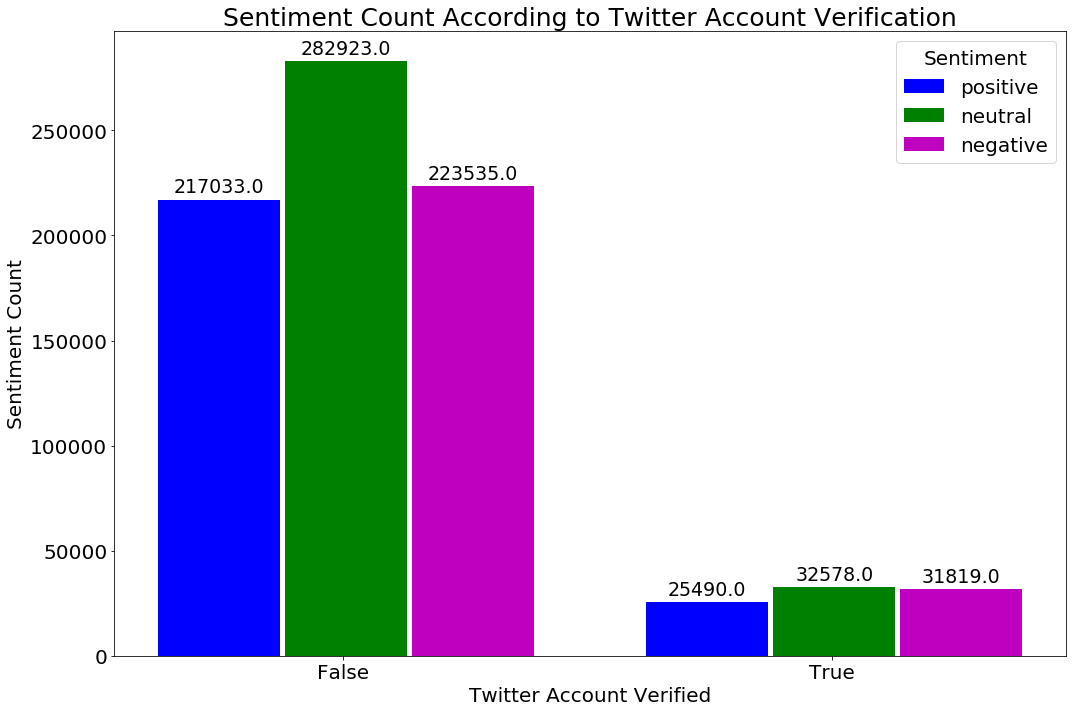

In [5]:
##Create barplot comparing the verified variable to the sentiment variable

d_verified = sorted(tweets['verified'].unique())
positive_count = list(tweets.sentiment.eq('positive').groupby(tweets.verified).sum())
neutral_count = list(tweets.sentiment.eq('neutral').groupby(tweets.verified).sum())
negative_count = list(tweets.sentiment.eq('negative').groupby(tweets.verified).sum())

x = np.arange(len(d_verified))  # the x locations for the values in the verified column
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (15,10))
rects1 = ax.bar(x - 0.38, positive_count, width, color = 'b', label='positive', align='edge')
rects2 = ax.bar(x - 0.12, neutral_count, width, color = 'g', label='neutral', align='edge')
rects3 = ax.bar(x + 0.14, negative_count, width, color = 'm', label='negative', align='edge')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Twitter Account Verified')
ax.set_ylabel('Sentiment Count')
ax.set_title('Sentiment Count According to Twitter Account Verification')
ax.set_xticks(x)
ax.set_xticklabels(d_verified)
ax.legend(title='Sentiment', title_fontsize=20)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom').set_fontsize(19)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()